# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
101,12.60,1.34,1.90,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562,1
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,1
160,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520,2
144,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.00,855,2
12,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,0
58,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285,0
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105,0
165,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520,2
129,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,1
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,1


(178, 14)


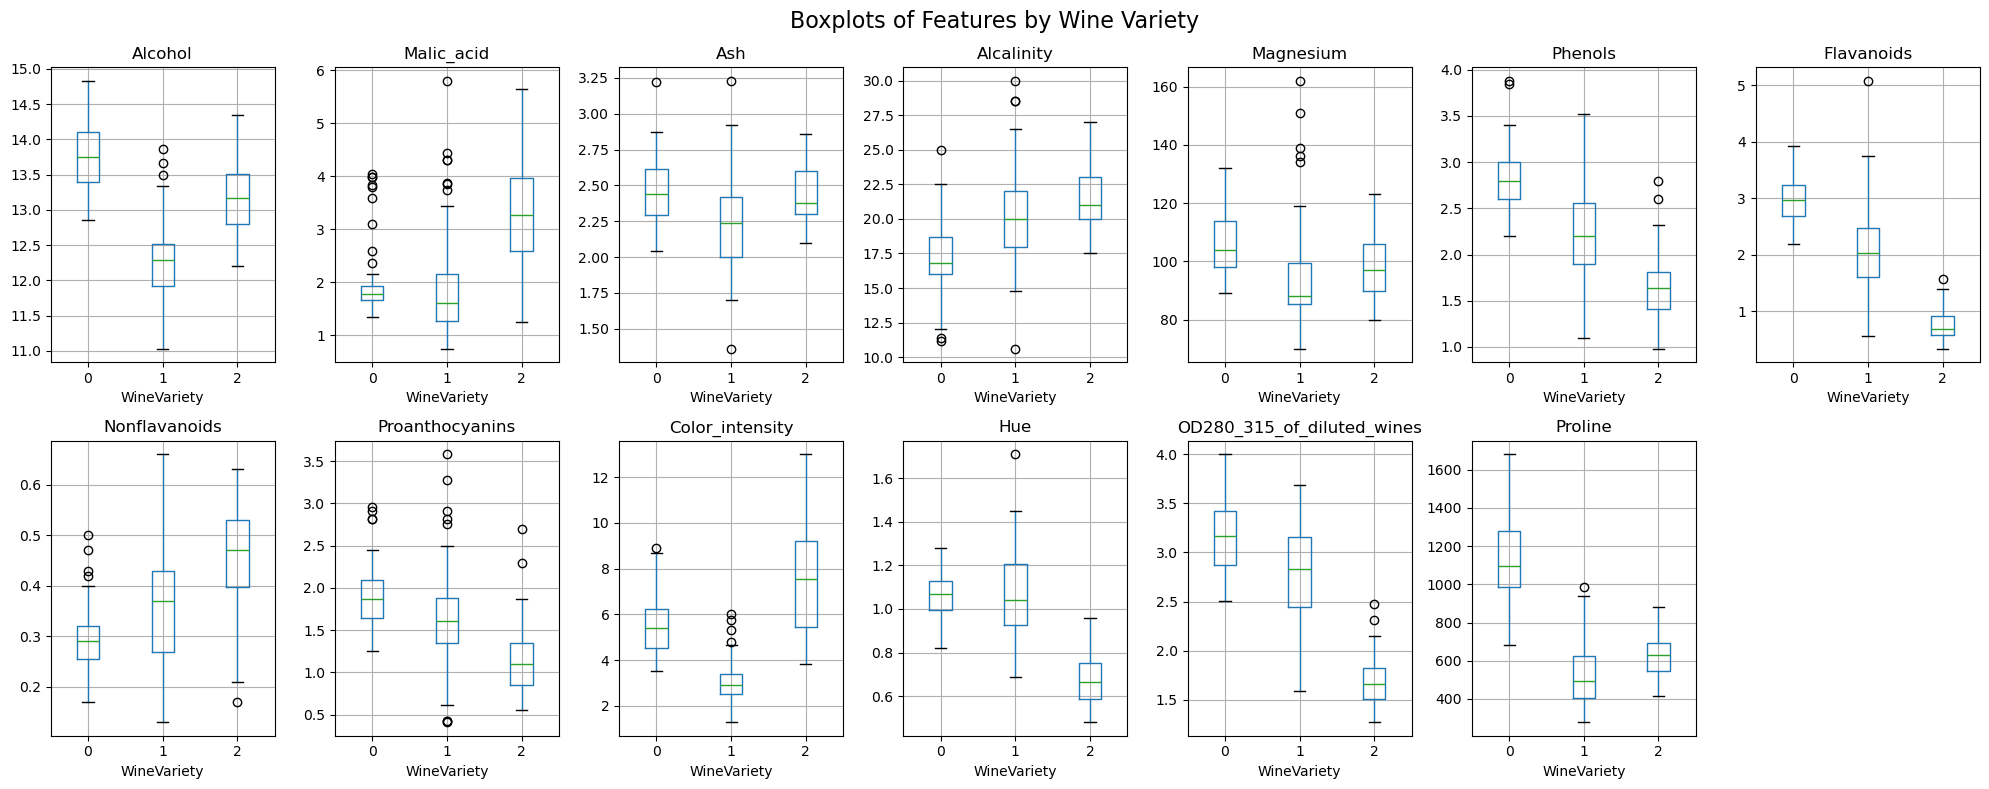

In [2]:
import matplotlib.pyplot as plt

print(data.shape)
features = data.columns[:13]
label = data.columns[13]

X = data[features].values
y = data[label].values

wine_variety =  ['Variety A','Variety B','Variety C']

fig, ax = plt.subplots(2, 7, figsize=(20, 8))

# Flatten the ax array to easily loop over it
ax = ax.flatten()


# Loop through the features and plot a boxplot for each feature
for i, col in enumerate(features):
    data.boxplot(column=col, by=label, ax=ax[i])
    ax[i].set_title(col)

# Remove the last subplot (since you only have 13 plots)
fig.delaxes(ax[13])

plt.suptitle('Boxplots of Features by Wine Variety', fontsize=16)
plt.tight_layout()
plt.show()
    

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [3]:
#Data Splitting

from sklearn.model_selection import train_test_split

#Data splitting 70% training set and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

print(f'Training cases: {X_train.shape[0]}')
print(f'Testing cases : {X_test.shape[0]}')

print(data[label].value_counts())  #the support for labels is only slightly different but so no need to stratify

Training cases: 124
Testing cases : 54
WineVariety
1    71
0    59
2    48
Name: count, dtype: int64


In [4]:
#TRAINGING PIPELINE

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#since all features are numeric
features = features
X_train = pd.DataFrame(X_train, columns = features)
X_test= pd.DataFrame(X_test, columns = features)

# Create a feature transformation pipeline for standardizing numerical features
feature_transformer = Pipeline(steps =[
    ('scalar', StandardScaler())
])

# Apply preprocessing to the specified features using ColumnTransformer
preprocessor = ColumnTransformer(transformers =[
    ('preprocess', feature_transformer, features)
])

# Construct a full pipeline combining preprocessing and model training
pipeline0 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVC(probability = True))
])

pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linregressor', LogisticRegression(solver='lbfgs', multi_class='auto'))
])



def train_and_predict( pipeline, index, X_train, y_train, X_test):
    model = pipeline.fit(X_train, y_train)
    prediction = model.predict(X_test)
    probabilities = model.predict_proba(X_test)

    return {f"model{index}": model, 
            f"model{index}_predictions": prediction, 
            f"model{index}_pred_prob": probabilities}

pipieline_list = [pipeline0, pipeline1]
results = {}

for i, pipeline in enumerate(pipieline_list):
    results.update(train_and_predict(pipeline, i,  X_train, y_train, X_test))

print(results.keys())  # Check what keys exist


dict_keys(['model0', 'model0_predictions', 'model0_pred_prob', 'model1', 'model1_predictions', 'model1_pred_prob'])


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.89      1.00      0.94        17
           2       1.00      0.88      0.94        17

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

[[20  0  0]
 [ 0 17  0]
 [ 0  2 15]]


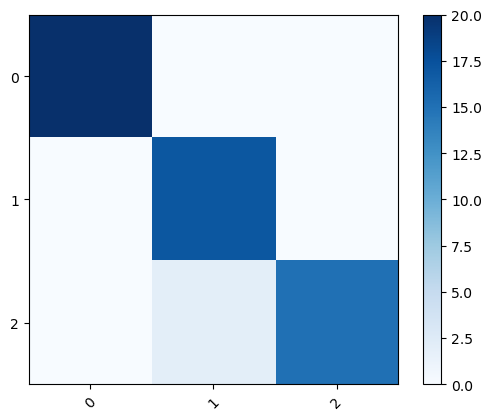

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[20  0  0]
 [ 0 17  0]
 [ 0  1 16]]


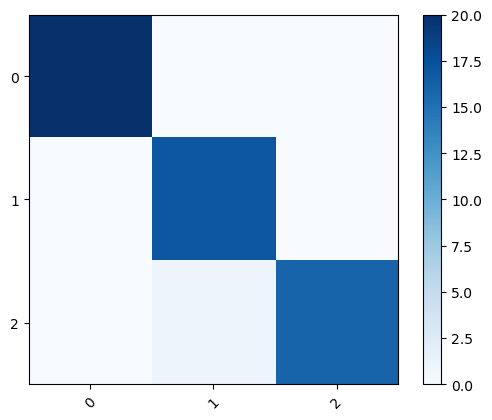

In [5]:
#EVALUATION

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np


# Evaluation function
def evaluation_metrics(predictions, y_test):
    """Prints classification report and confusion matrix."""
    print(classification_report(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    print(cm)

    # Plot confusion matrix
    
    # Visualization of the confusion matrix
    # Different interpolation methods can be used:
    # - 'bilinear' smooths colors between pixels
    # - 'bicubic' provides even smoother color transitions
    # - 'nearest' (used here) keeps each pixel as a solid block of color
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    
    class_labels = np.unique(y_test)  # FIXED: Defined class labels dynamically
    plt.xticks(range(len(class_labels)), class_labels, rotation=45)
    plt.yticks(range(len(class_labels)), class_labels)
    
    plt.show()

# Evaluate first model
evaluation_metrics(results['model0_predictions'], y_test)
evaluation_metrics(results['model1_predictions'], y_test)

This section evaluates the performance of our Support Vector Machine (SVM) model and logistic regression model trained to classify different wine varieties. The results include a classification report and a confusion matrix visualization.
We can see that Model 2 - Logistic Regression is a better fit to our data due to its higher metric values from its classification report.

Accuracy: The model achieved 98% accuracy, meaning it correctly classified 96% of the test samples.
Precision & Recall:
Class 0 (Variety A) and Class 2 (Variety C) have 100% precision, indicating no false positives.
Class 1 (Variety B) has a slightly lower precision (0.94) but perfect recall (1.00), meaning all actual Variety B wines were correctly classified.
Class 2 (Variety C) has a recall of 0.94, suggesting that 6% of Class 2 samples were misclassified.

Confusion Matrix:
The confusion matrix heatmap visually highlights these misclassifications. The color intensity represents the number of correct and incorrect predictions.
Variety A and Variety B have no missclassification, however 1 samples from Variety C were misclassified as Variety A.

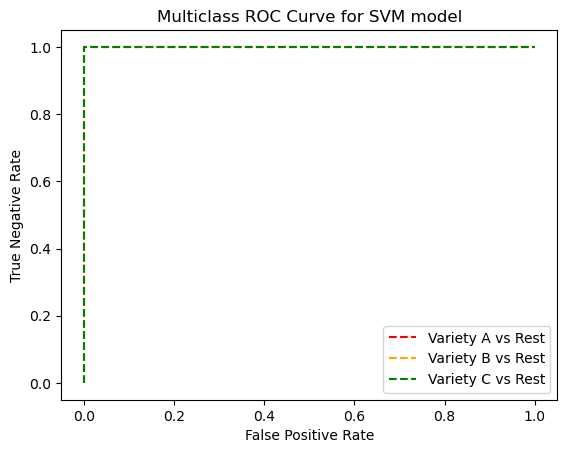

1.0


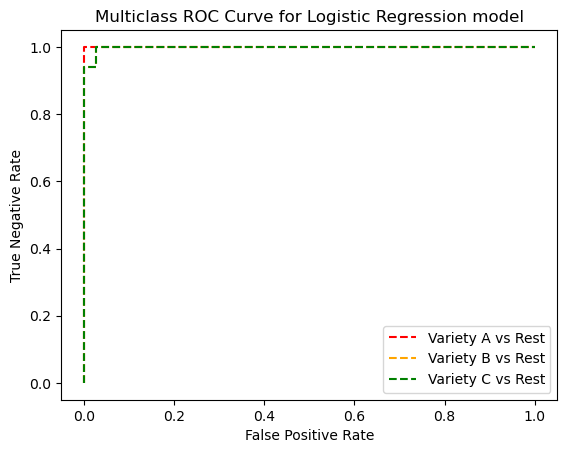

0.9989401165871755


In [9]:
#ROC AND AUC 

# dictionaries to store false positive rate (FPR), true positive rate (TPR), and thresholds
fpr = {}
tpr = {}
threshold ={}
color = ['red','orange','green']

#Compute and plot ROC curve for each type of wine
def roc_auc(y_test, probability, model_name):
    """
    Computes and plots the ROC Curve for a multiclass classification problem using the One-Versus-Rest (OvR) method.
    """

    #Create Dictionaries to store ture and false positive rates and thresholds
    fpr = {}
    tpr = {}
    threshold = {}
    color = ['red','orange','green']


    # Compute ROC
    for i in range(len(wine_variety)):
        fpr[i], tpr[i], threshold[i] = roc_curve(y_test, probability[:,i], pos_label =i)
        plt.plot(fpr[i], tpr[i], ls = '--', color = color[i], label = wine_variety[i] + ' vs Rest')
        
    plt.title('Multiclass ROC Curve for ' + model_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Negative Rate')
    plt.legend(loc='best')
    plt.show()
    
    # Compute the overall AUC score using the One-Versus-Rest (OvR) method
    auc = roc_auc_score(y_test, probability, multi_class= 'ovr')
    print(auc)

roc_auc(y_test, results['model0_pred_prob'], 'SVM model')
roc_auc(y_test, results['model1_pred_prob'], 'Logistic Regression model')

An AUC of 1 means that the model's decision boundary perfectly separates all classes and there is no overlap between the distributions of probabilities for different classes.

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [11]:
# Your code to predict classes for the two new samples
import numpy as np
import joblib

filename1 = './wine_variety_model1.pkl'
joblib.dump(results['model1'], filename1)

model1 = joblib.load(filename1)

X_new = pd.DataFrame([
    [13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
    [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]
], columns = features)

predictions = model1.predict(X_new)

for prediction in predictions:
    print(f'Prediction Class: {prediction} ({wine_variety[prediction]})')

Prediction Class: 0 (Variety A)
Prediction Class: 1 (Variety B)
